In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd_data = pd.read_csv('전국무인교통단속카메라표준데이터_utf8.csv', encoding='utf8', dtype='str')
print(pd_data)

      무인교통단속카메라관리번호    시도명 시군구명  도로종류  도로노선번호   도로노선명 도로노선방향  \
0             F5894  서울특별시  관악구  특별시도     NaN   남부순환로      2   
1             F5895  서울특별시  관악구  특별시도     NaN   남부순환로      2   
2             F5896  서울특별시  관악구  특별시도     NaN     호암로      1   
3             F5897  서울특별시  관악구  특별시도     NaN   남부순환로      2   
4             F5898  서울특별시  마포구  특별시도     NaN    마포대로      2   
...             ...    ...  ...   ...     ...     ...    ...   
34217         F0017   경상북도  울진군  일반국도     36번  국도36호선     02   
34218         F0018   경상북도  울진군  일반국도     36번  국도36호선     01   
34219         F0019   경상북도  울진군  일반국도     36번  국도36호선     02   
34220         F0020   경상북도  울진군    기타  중로 2-1   중로2-1     03   
34221         F0021   경상북도  울진군    기타  중로 2-1   중로2-1     02   

                   소재지도로명주소                   소재지지번주소           위도  ... 제한속도  \
0      서울특별시 관악구 남부순환로 1860                       NaN    37.479625  ...   50   
1      서울특별시 관악구 남부순환로 1817                       NaN  37.48164117  ...

In [2]:
# 도로 종류별 설치 대수
p1 = pd_data['도로종류']
print(p1.head(10))    # head(): 상위 몇개 // tail(): 하위 몇개
print('----------------------')
print(p1.hasnans)
print('----------------------')
print(p1[p1.isna()])
print('----------------------')
p1.replace('99', '기타', inplace=True)
print(p1.unique())
print('----------------------')
print(p1.value_counts())

0    특별시도
1    특별시도
2    특별시도
3    특별시도
4    특별시도
5    일반국도
6    특별시도
7    특별시도
8    특별시도
9    일반국도
Name: 도로종류, dtype: object
----------------------
False
----------------------
Series([], Name: 도로종류, dtype: object)
----------------------
['특별시도' '일반국도' '시도' '지방도' '고속국도' '군도' '구도' '기타' '국가지원지방도' '기타 ']
----------------------
시도         13544
일반국도        6978
지방도         3733
특별시도        3206
기타          2531
군도          1646
구도          1415
고속국도        1130
국가지원지방도       38
기타             1
Name: 도로종류, dtype: int64


[2010 2021 2020 2017 2018 2019 2009 2016 2015 2014 2022 2011 2008 2013
 2012 2007 2006 2005 2004 2003 2002]
2021    5329
2020    5263
2019    3227
2018    2758
2017    2432
2016    1784
2015    1239
2014    1178
2013    1037
2022     770
2011     766
2010     664
2009     433
2012     354
2008     310
2007     217
2006     146
2005      97
2004      21
2003       5
2002       3
Name: 설치연도, dtype: int64
<class 'pandas.core.series.Series'>
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022]


<BarContainer object of 21 artists>

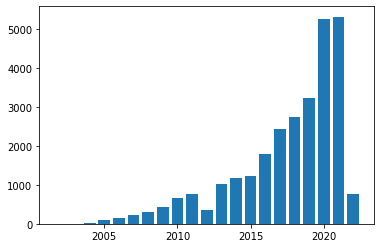

In [3]:
# 설치 연도별 설치 대수 - 연도(x), 대수(y), axe.bar(x,y)
p2 = pd_data['설치연도'].dropna().astype('int')
# print(p2)

# print(p2.hasnans)
# p2.dropna(inplace=True)
# p2 = p2.astype('int')
print(p2.unique())
x = p2.value_counts()
print(x)
print(type(x))
p_sorted = np.sort(x.index)
print(p_sorted)
x = x.reindex(p_sorted)

_, axe = plt.subplots();
axe.bar(p_sorted, x.to_numpy())


In [55]:
# 제한 속도별 설치 대수, 평균 제한속도 구하기
# 평균 제한속도 구하기
# 0 값은 뺄것

p3 = pd_data['제한속도']
print(p3)
p3.replace(69, 60, inplace=True)
print(p3.value_counts())


0        50
1        50
2        40
3        50
4        50
         ..
34217    60
34218    60
34219    60
34220    30
34221    30
Name: 제한속도, Length: 34222, dtype: object
30     8287
50     6915
60     6633
0      5587
70     2408
80     2360
100     870
40      762
110     185
90      182
20       31
69        2
Name: 제한속도, dtype: int64
